**PySpark no Google Colab**

In [1]:
# instalar as dependências
# baixando a versão mais recente do java8;
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#download via stp do hadoop
!wget -q https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
#extraindo o arquivo tgz
!tar xf /content/spark-3.3.1-bin-hadoop3.tgz
#instalando o  Findspark que é responsavel para que as variáveis ​​do ambiente sejam definidas corretamente e o pyspark seja importado.
!pip install -q findspark

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

# utilizando o findspark para que o pyspark seja "importável"
import findspark
findspark.init('spark-3.3.1-bin-hadoop3')

**SparkSession**

In [20]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

df = spark.read.csv(path='/mnt/clientes_to_distinct.csv',sep=';',header='True',inferSchema='True')

# df.show(10,False)
df.show()

+----------+----------+------+--------+--------------------+------------+------+-------+--------+----------------+---------+----------+
|cliente_id|nm_cliente|nr_cpf|dt_nasci|         complemento| nr_telefone|   cep|cep_mae| salario|desconto_salario|cod_banco|nome_banco|
+----------+----------+------+--------+--------------------+------------+------+-------+--------+----------------+---------+----------+
|         1| guilherme|108908|30031986|             179,...|00-0910-2646|400487|   null|71993.34|              21|       33| Santander|
|         1| guilherme|163362|20031983|             97,c...|00-1365-3969|400487|   null|34812.34|             208|       33| Santander|
|         1| guilherme|217816|26041989|             194,...|00-1820-5292|400487|   null|13884.47|             219|       33| Santander|
|         2| guilherme|272270|18111982|             304,...|00-2275-6615|  null| 400487|88561.84|              12|       33| Santander|
|         2|     vitor|326724|29081988|         

**OrderBy**

Ordena o dataframe pelas colunas de chave e retorna um novo dataframe.

In [27]:
df_2 = df.orderBy('desconto_salario','nr_cpf',ascending=False)

df_2.show()

+----------+----------+------+--------+--------------------+------------+------+-------+--------+----------------+---------+----------+
|cliente_id|nm_cliente|nr_cpf|dt_nasci|         complemento| nr_telefone|   cep|cep_mae| salario|desconto_salario|cod_banco|nome_banco|
+----------+----------+------+--------+--------------------+------------+------+-------+--------+----------------+---------+----------+
|         2|     vitor|326724|29081988|             207,...|00-2730-7938|400487|   null|32141.87|             220|       33| Santander|
|         1| guilherme|217816|26041989|             194,...|00-1820-5292|400487|   null|13884.47|             219|       33| Santander|
|         4|   rogerio|490086|19051996|             66,c...|00-4096-1907|400487|   null|14216.09|             214|       33| Santander|
|         1| guilherme|163362|20031983|             97,c...|00-1365-3969|400487|   null|34812.34|             208|       33| Santander|
|         4|   rogerio|435632|15071997|         

**Aninhamento de método**

In [32]:
df_2 = df.orderBy('desconto_salario')\
  .select('cliente_id','nm_cliente','desconto_salario')

df_2.show()

+----------+----------+----------------+
|cliente_id|nm_cliente|desconto_salario|
+----------+----------+----------------+
|         2| guilherme|              12|
|         1| guilherme|              21|
|         3|    kelvin|             149|
|         4|   rogerio|             164|
|         1| guilherme|             208|
|         4|   rogerio|             214|
|         1| guilherme|             219|
|         2|     vitor|             220|
+----------+----------+----------------+



**Métodos de Ação de um dataframe**

**.count()**

retorna a contagem de linhas de um dataframe

In [42]:
df.count()

8

**Métodos que precisa de muito cuidado em usar...**

pois se o dataframe for maior que a memória do driver, acabará matando a maquina



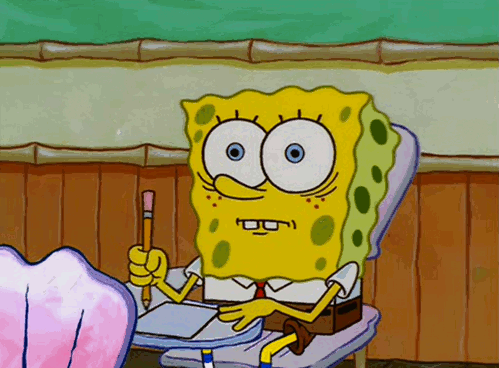



**.take()**

In [49]:
list_rows = df.take(5)

print(list_rows[0])

Row(cliente_id=1, nm_cliente='guilherme', nr_cpf=108908, dt_nasci=30031986, complemento='             179,casa 1         ', nr_telefone='00-0910-2646', cep=400487, cep_mae=None, salario=71993.34, desconto_salario=21, cod_banco=33, nome_banco='Santander')


**Dica sênior do dia**

Quando estiver conferindo o resultado de um dataframe e tiver curiosidade de saber se está retornando vazio.

invés de fazer isso:


```
df.count()
```
faça isso:

```
len(df.take(1))
```




**.collect()**

retorna as linhas do dataframe em uma lista do python

In [53]:
lista_rows_df = df.collect()

print(lista_rows_df)

[Row(cliente_id=1, nm_cliente='guilherme', nr_cpf=108908, dt_nasci=30031986, complemento='             179,casa 1         ', nr_telefone='00-0910-2646', cep=400487, cep_mae=None, salario=71993.34, desconto_salario=21, cod_banco=33, nome_banco='Santander'), Row(cliente_id=1, nm_cliente='guilherme', nr_cpf=163362, dt_nasci=20031983, complemento='             97,casa 1         ', nr_telefone='00-1365-3969', cep=400487, cep_mae=None, salario=34812.34, desconto_salario=208, cod_banco=33, nome_banco='Santander'), Row(cliente_id=1, nm_cliente='guilherme', nr_cpf=217816, dt_nasci=26041989, complemento='             194,casa 3         ', nr_telefone='00-1820-5292', cep=400487, cep_mae=None, salario=13884.47, desconto_salario=219, cod_banco=33, nome_banco='Santander'), Row(cliente_id=2, nm_cliente='guilherme', nr_cpf=272270, dt_nasci=18111982, complemento='             304,casa 1         ', nr_telefone='00-2275-6615', cep=None, cep_mae=400487, salario=88561.84, desconto_salario=12, cod_banco=33,

**.toPandas()**

retorna as linhas do Spark Dataframe em um dataframe do Pandas

In [58]:
# type(df)
df_pandas = df.toPandas()
# type(df_pandas)
df_pandas

# help(df.toPandas)

,cliente_id,nm_cliente,nr_cpf,dt_nasci,complemento,nr_telefone,cep,cep_mae,salario,desconto_salario,cod_banco,nome_banco
0,1,guilherme,108908,30031986,"179,casa 1",00-0910-2646,400487.0,NaN,71993.34,21,33,Santander
1,1,guilherme,163362,20031983,"97,casa 1",00-1365-3969,400487.0,NaN,34812.34,208,33,Santander
2,1,guilherme,217816,26041989,"194,casa 3",00-1820-5292,400487.0,NaN,13884.47,219,33,Santander
3,2,guilherme,272270,18111982,"304,casa 1",00-2275-6615,NaN,400487.0,88561.84,12,33,Santander
4,2,vitor,326724,29081988,"207,casa 1",00-2730-7938,400487.0,NaN,32141.87,220,33,Santander
5,3,kelvin,381178,15011997,"121,casa 2",00-3185-9261,400487.0,NaN,52535.62,149,33,Santander
6,4,rogerio,435632,15071997,"309,casa 1",00-3641-0584,400487.0,NaN,22055.04,164,33,Santander
7,4,rogerio,490086,19051996,"66,casa 3",00-4096-1907,400487.0,NaN,14216.09,214,33,Santander
